Import dependencies

In [1]:
from utils import compute_all_exp, compute_coverages, get_instances_best_coverage, aggregate_coverages, plot_coverage
from shap import KernelExplainer
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np

Load and transform dataset in a 2D dataset

In [2]:
iris = load_iris(return_X_y=False)
X = iris.data[:,1:3]
y = iris.target
feature_names = iris.feature_names[1:3]

Train model

In [3]:
model = MLPClassifier(random_state=1, max_iter=300)
model.fit(X, y)
print(accuracy_score(model.predict(X),y))

0.94


Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.


Initialize explainer

In [4]:
explainer = KernelExplainer(model.predict_proba, X)

Using 150 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


Compute explanations for all instances of data space

In [5]:
explanations = compute_all_exp(X, explainer, model, label="all")

100%|██████████| 79/79 [00:31<00:00,  2.47it/s]


Compute the coverage of validity domain of explanation for each instance of X

In [6]:
coverages = compute_coverages(X, explanations, model, explainer, threshold=0.15, metric='euclidean')

100%|██████████| 150/150 [01:01<00:00,  2.43it/s]


Get the best instances to cover the data space with validity domains

In [7]:
instances_best_coverage = get_instances_best_coverage(coverages,k=5)
instances_coord=X[instances_best_coverage]

Aggregate the coverages and show individual validity domains

100%|██████████| 79/79 [00:00<00:00, 189.05it/s]


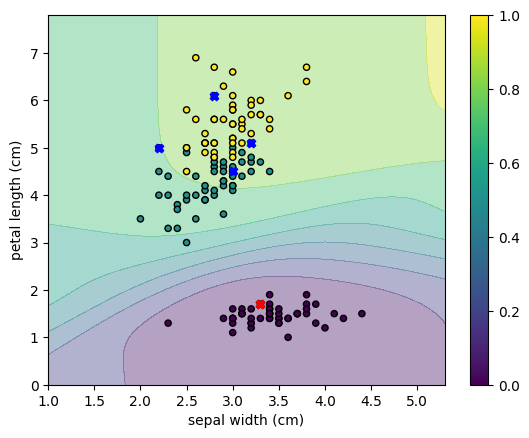

100%|██████████| 79/79 [00:00<00:00, 196.54it/s]


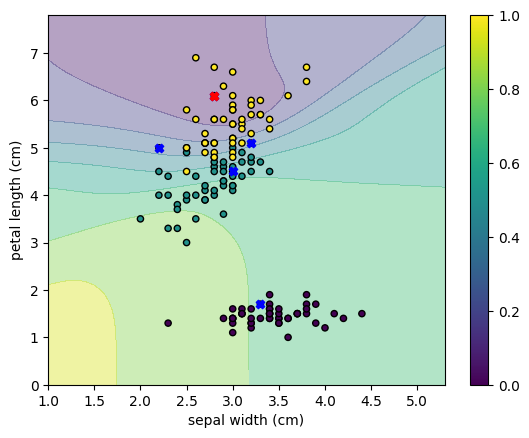

100%|██████████| 79/79 [00:00<00:00, 195.11it/s]


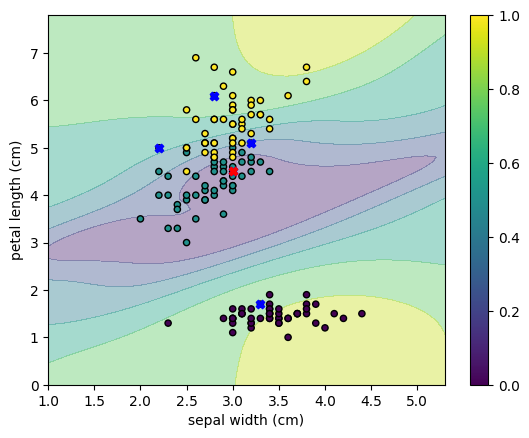

100%|██████████| 79/79 [00:00<00:00, 191.87it/s]


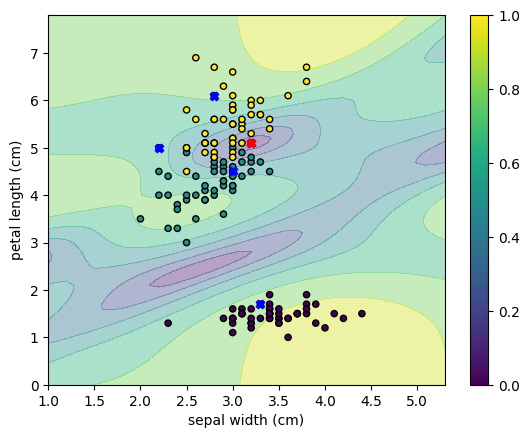

100%|██████████| 79/79 [00:00<00:00, 192.21it/s]


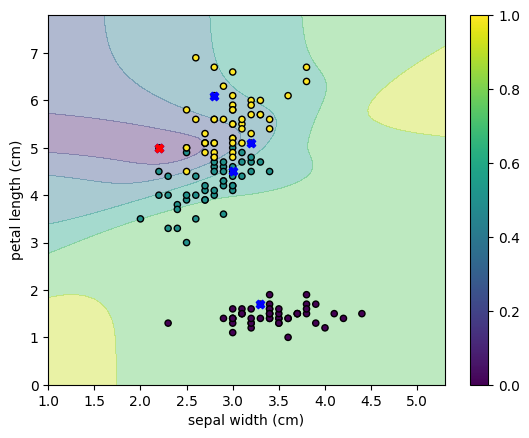

In [8]:
global_coverage = np.full((len(explanations),), False).tolist()
global_coverage = aggregate_coverages(X, y, feature_names, explanations, model, explainer, instances_coord, global_coverage, show=True)

Show global coverage

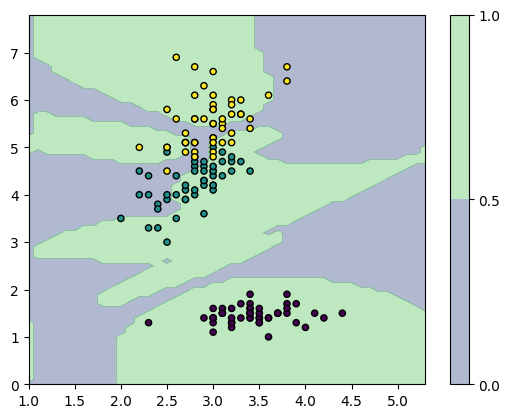

In [9]:
plot_coverage(X, y, global_coverage)